In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
random_state=42

%matplotlib inline

In [2]:
mimic_df = pd.read_csv("/home/ab1/Desktop/SPH6004/sph6004_assignment1_data.csv")
mimic_df.head()
mimic_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,50920.0,3.498391e+07,2.893873e+06,3.000015e+07,3.246663e+07,3.498649e+07,3.748413e+07,3.999981e+07
aki,50920.0,1.300393e+00,1.088128e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
admission_age,50920.0,6.494201e+01,1.727826e+01,1.800253e+01,5.450388e+01,6.671333e+01,7.815129e+01,1.028656e+02
heart_rate_min,50841.0,6.990300e+01,1.514181e+01,1.000000e+00,6.000000e+01,6.900000e+01,7.900000e+01,1.670000e+02
heart_rate_max,50841.0,1.024950e+02,2.048137e+01,3.600000e+01,8.800000e+01,1.000000e+02,1.140000e+02,2.800000e+02
...,...,...,...,...,...,...,...,...
gcs_verbal,50407.0,3.385066e+00,2.090396e+00,0.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
gcs_eyes,50542.0,3.124471e+00,1.106433e+00,1.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00
gcs_unable,50685.0,2.056427e-01,4.041745e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
height,25011.0,1.696282e+02,1.068397e+01,1.220000e+02,1.630000e+02,1.700000e+02,1.780000e+02,2.260000e+02


In [3]:
mimic_df.nunique()

id               50920
aki                  4
gender               2
admission_age    50695
race                33
                 ...  
gcs_verbal           6
gcs_eyes             4
gcs_unable           2
height              98
weight_admit      1506
Length: 162, dtype: int64

In [4]:
mimic_df.shape

(50920, 162)

## Basic Data cleaning and Splitting

In [5]:
mimic_df=mimic_df.drop(['id','race'],axis=1)
mimic_df['gender']= np.where(mimic_df['gender']== "F", 0, 1)
mimic_df['aki']= np.where(mimic_df['aki']== 0, 0, 1)


In [6]:
data_train, data_test = train_test_split( mimic_df,test_size=0.3, random_state=42 ) 

## Training Data- Data cleaning and EDA

                 NA Percentage
thrombin_min             99.81
thrombin_max             99.81
d_dimer_min              99.80
d_dimer_max              99.80
ggt_max                  99.09
...                        ...
heart_rate_min            0.16
heart_rate_mean           0.16
gender                    0.00
admission_age             0.00
aki                       0.00

[160 rows x 1 columns]


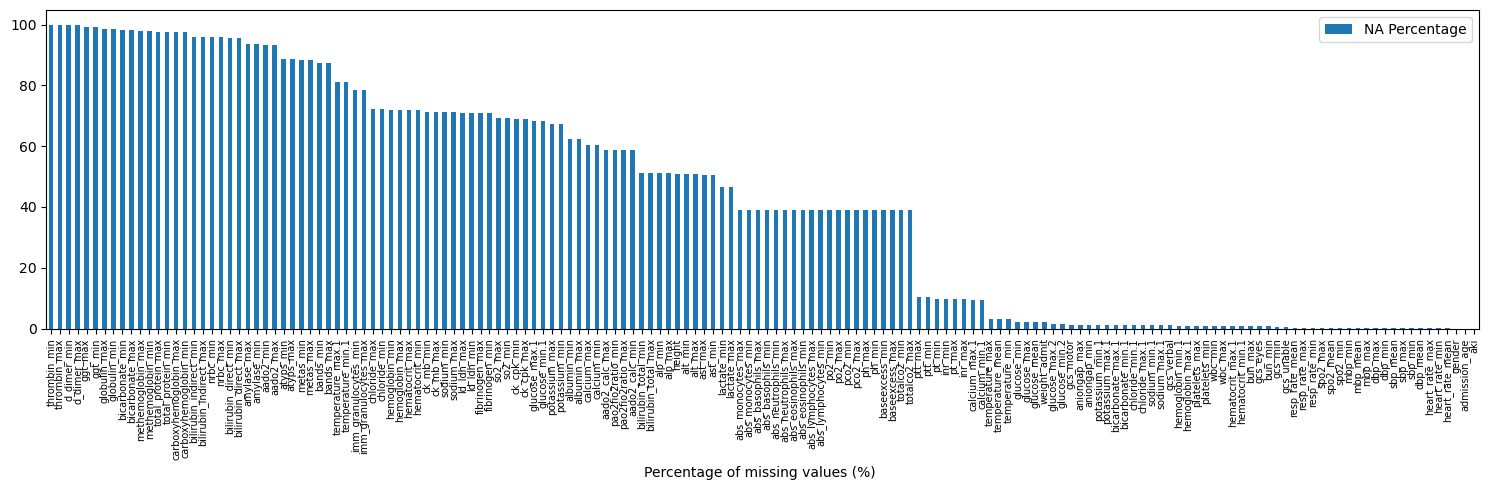

In [7]:
data_train_perc = data_train.isna().mean().round(4) * 100
data_train_perc= data_train_perc.sort_values(ascending=False)
data_train_perc = pd.DataFrame({'NA Percentage' :data_train_perc})
print(data_train_perc)
#plt.figure(figsize=(10, 6)) 
plt.rcParams['figure.figsize'] = (15,5)

data_train_perc.plot(kind="bar")
plt.xticks(fontsize=7)

plt.xlabel('Percentage of missing values (%) ')
plt.tight_layout()
plt.savefig('/home/ab1/Desktop/SPH6004/assignment1_NA_perc.jpg')
plt.show()

In [8]:
#remove column if more than 40% missing data
data_train.dropna(axis=1,thresh=0.6*len(data_train),inplace=True)
data_train.shape

(35644, 83)

In [9]:
data_train.isna().sum()

aki                 0
gender              0
admission_age       0
heart_rate_min     57
heart_rate_max     57
                 ... 
gcs_motor         453
gcs_verbal        371
gcs_eyes          274
gcs_unable        172
weight_admit      721
Length: 83, dtype: int64

In [10]:
print(data_train.describe())

                aki        gender  admission_age  heart_rate_min  \
count  35644.000000  35644.000000   35644.000000    35587.000000   
mean       0.670043      0.557092      64.950662       69.929581   
std        0.470204      0.496737      17.274568       15.156811   
min        0.000000      0.000000      18.002527        1.000000   
25%        0.000000      0.000000      54.513974       60.000000   
50%        1.000000      1.000000      66.701932       69.000000   
75%        1.000000      1.000000      78.186540       79.000000   
max        1.000000      1.000000     102.865603      167.000000   

       heart_rate_max  heart_rate_mean       sbp_min       sbp_max  \
count    35587.000000     35587.000000  35573.000000  35573.000000   
mean       102.500717        84.267200     93.217283    148.218766   
std         20.511650        15.710683     17.584575     22.715582   
min         36.000000        28.500000      0.108000     34.000000   
25%         88.000000        73.20000

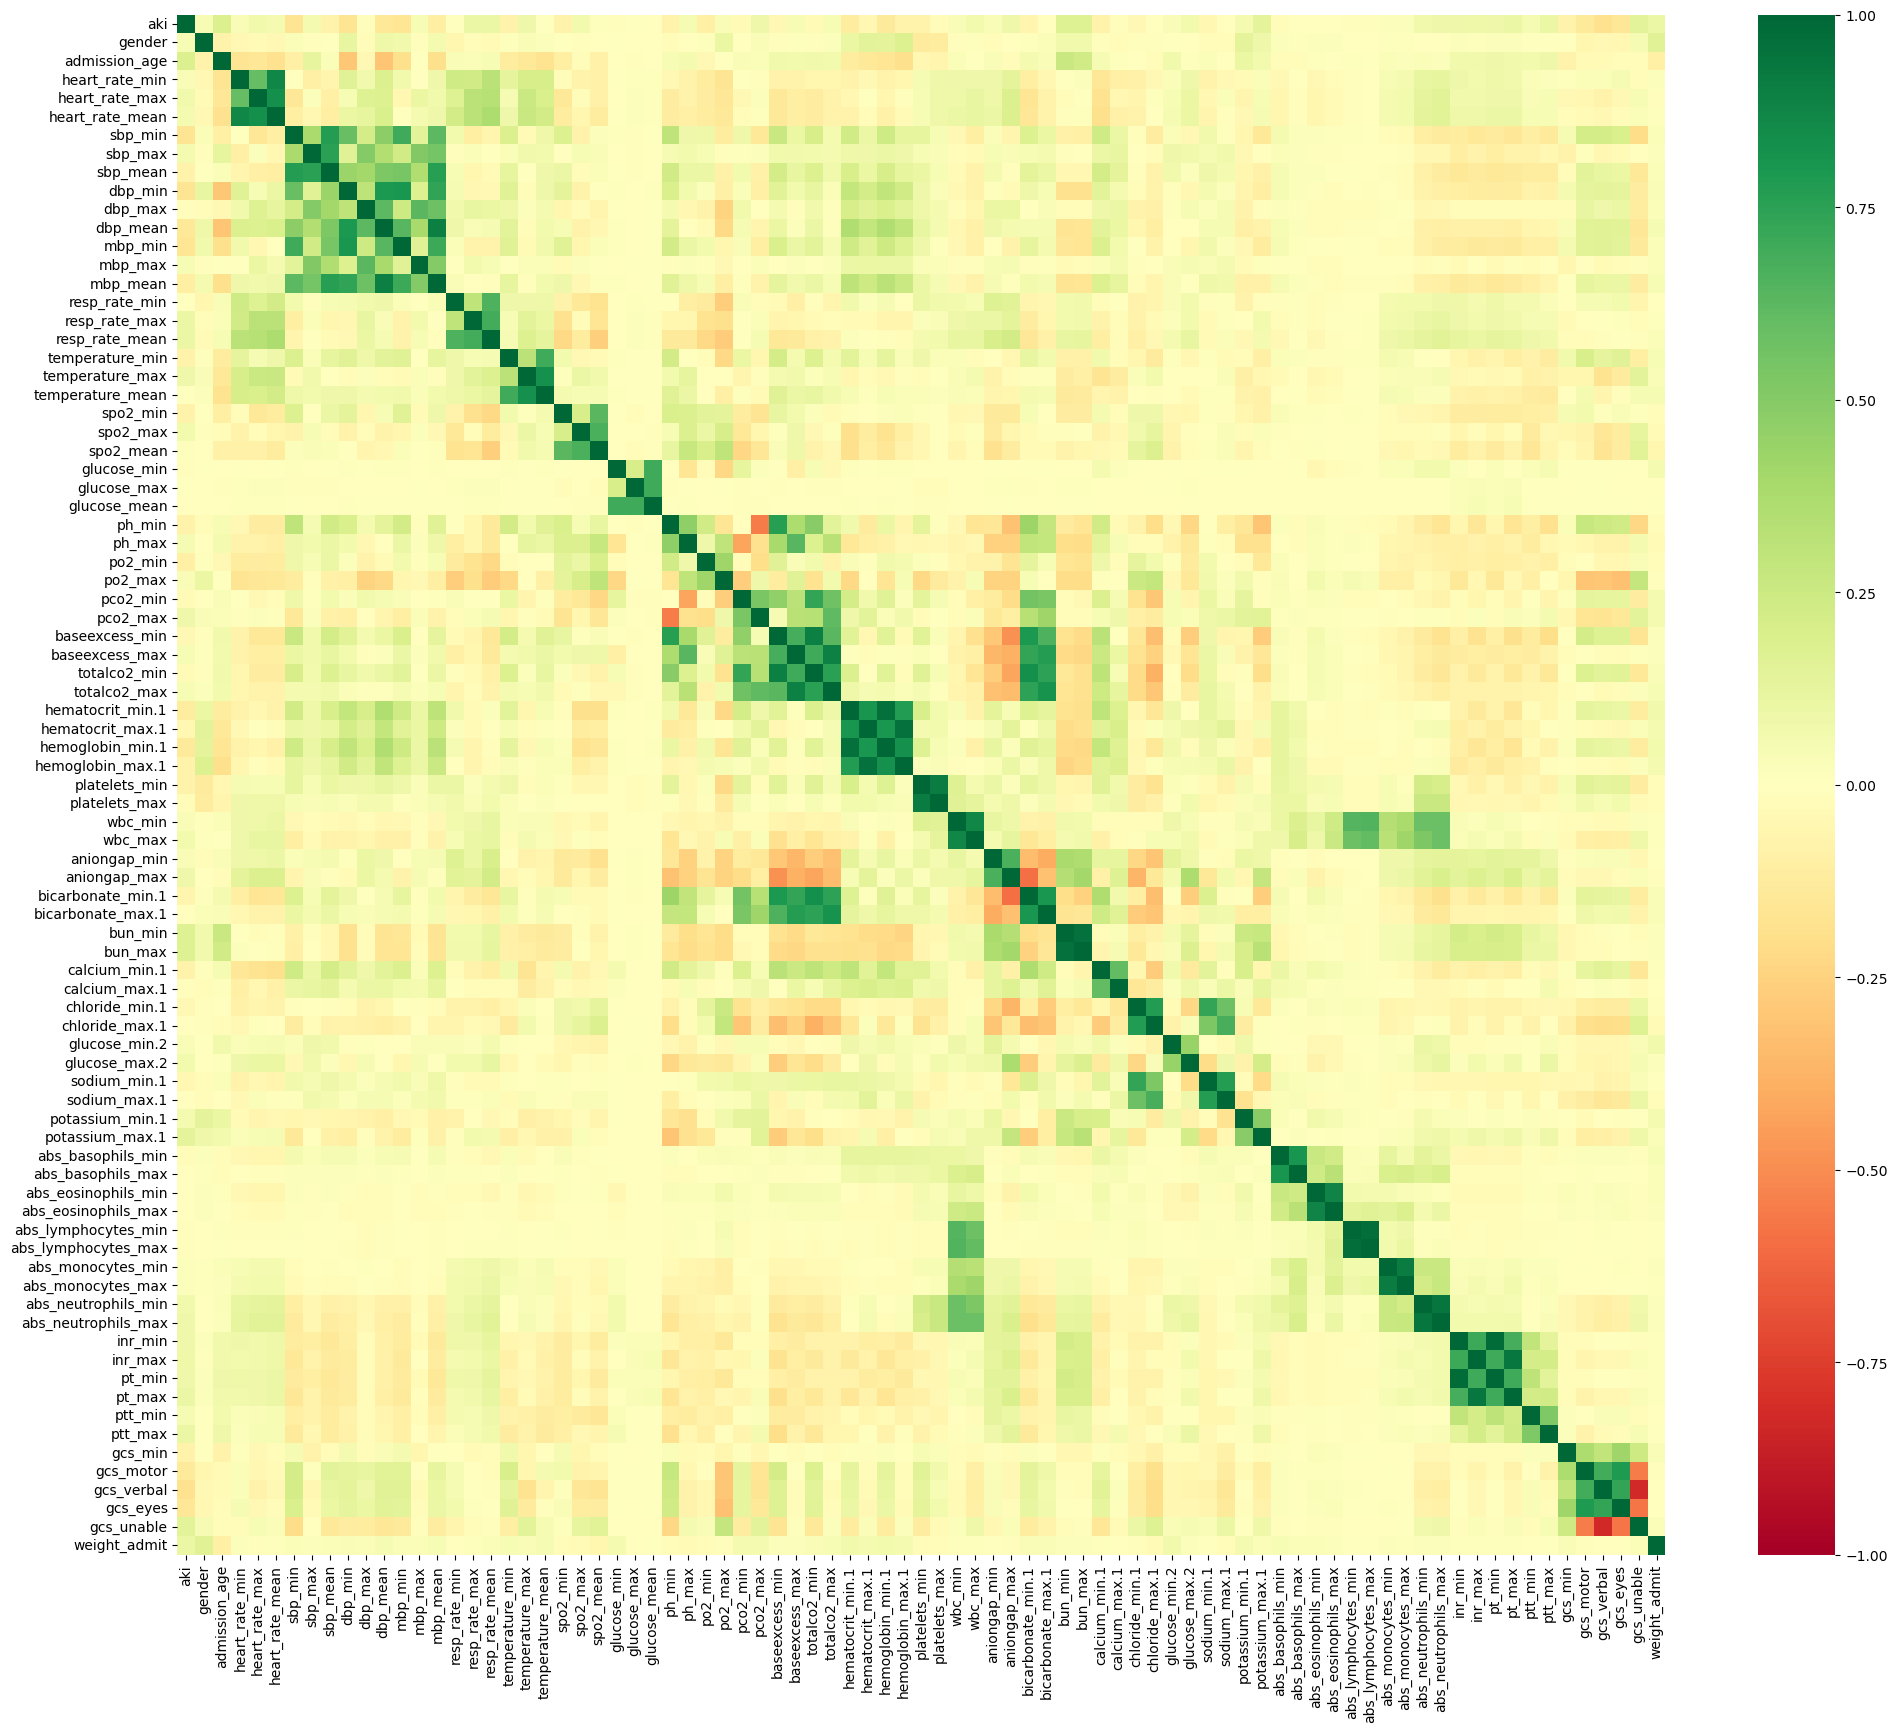

In [11]:
## correlation plot of all features

plt.figure(figsize=(24, 20))
sns.heatmap( data_train.corr(), vmin=-1, vmax=1, cmap="RdYlGn" )
plt.savefig('/home/ab1/Desktop/SPH6004/assignment1_correlation_features.jpg')
plt.show()

In [12]:
# Training data: define features and outcome

train_features=data_train.copy(deep=True)
train_features=train_features.drop(["aki"],axis=1)
train_outcome=data_train["aki"].astype(int)
columns_to_keep=train_features.columns

In [13]:
# Testing data: define features and outcome

test_features=data_test.copy(deep=True)
test_features=test_features[columns_to_keep]
test_outcome=data_test["aki"].astype(int)

## Data standardization and imputation

In [14]:
# define columns based on their data type

all_columns=train_features.columns.tolist()
ordinal_cols=["gender","gcs_min","gcs_eyes","gcs_verbal","gcs_motor","gcs_unable"]
numerical_cols = [x for x in all_columns if x not in ordinal_cols]

In [15]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer, KNNImputer

# Standardize numerical columns
scaler = preprocessing.StandardScaler()
train_features[numerical_cols] = scaler.fit_transform(train_features[numerical_cols])
test_features[numerical_cols]=scaler.transform(test_features[numerical_cols])


In [16]:
# Impute numerical columns with KNNImputer

imputer_num = KNNImputer(n_neighbors=2)
train_features_imputed_numerical = pd.DataFrame(imputer_num.fit_transform(train_features[numerical_cols]),columns=train_features[numerical_cols].columns)
test_features_imputed_numerical = pd.DataFrame(imputer_num.transform(test_features[numerical_cols]),columns=test_features[numerical_cols].columns)



In [17]:
# Impute ordinal columns with SimpleImputer using mode

imputer_ord = SimpleImputer(strategy='most_frequent')
train_features_imputed_ordinal = pd.DataFrame(imputer_ord.fit_transform(train_features[ordinal_cols]),columns=train_features[ordinal_cols].columns)
test_features_imputed_ordinal = pd.DataFrame(imputer_ord.transform(test_features[ordinal_cols]),columns=test_features[ordinal_cols].columns)



In [18]:
# Combine training data features

train_features_imputed=pd.concat([train_features_imputed_numerical,train_features_imputed_ordinal],axis=1)
train_features_imputed.shape

(35644, 82)

In [19]:
# Combine testing data features

test_features_imputed=pd.concat([test_features_imputed_numerical,test_features_imputed_ordinal],axis=1)
train_features_imputed.shape

(35644, 82)

## Data balancing- SMOTE

In [20]:
from imblearn.over_sampling import SMOTE

# Oversampling to handle imbalance data using SMOTE
smote_sampler = SMOTE(random_state=42,sampling_strategy='minority')
X_SMOTE, y_SMOTE = smote_sampler.fit_resample(train_features_imputed, train_outcome)

## Feature Selection - LASSO 

In [21]:
from sklearn.linear_model import LassoCV

# Feature selection using LASSO 
logreg_lasso = LassoCV(random_state=42)
logreg_lasso.fit(X_SMOTE, y_SMOTE)

coef = pd.Series(logreg_lasso.coef_, index = X_SMOTE.columns)
print(coef)
lasso1_coef = np.abs(logreg_lasso.coef_)


admission_age      0.056629
heart_rate_min     0.033038
heart_rate_max     0.028034
heart_rate_mean   -0.035228
sbp_min           -0.024491
                     ...   
gcs_min            0.000012
gcs_eyes          -0.028239
gcs_verbal        -0.022768
gcs_motor          0.012582
gcs_unable         0.000000
Length: 82, dtype: float64


In [22]:
feature_subset=np.array(X_SMOTE.columns)[lasso1_coef>0.001]
feature_subset.shape

(73,)

In [23]:
X_selected = X_SMOTE[feature_subset]
test_features=test_features_imputed[feature_subset]

test_features.shape

(15276, 73)

## Model Testing

In [24]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

### Logistic Regression (L1-Lasso)

In [25]:
%%time
from sklearn.linear_model import LogisticRegression

# logistic regression model- LASSO
lr_1 = LogisticRegression( solver='liblinear',penalty="l1",random_state=42) #‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones(from sklearn)

# Define the hyperparameters to be tuned
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter' : [100,500,1000],
}

# Perform a grid search with cross-validation
best_lasso = GridSearchCV(lr_1, params, cv=5)
best_lasso.fit(X_selected, y_SMOTE)



CPU times: user 4min 3s, sys: 2.88 s, total: 4min 6s
Wall time: 2min 19s


GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', random_state=42,
                                          solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000]})

In [26]:
%%time
#tune and evaluate
y_pred_lasso = best_lasso.predict(test_features)
y_prob_lasso = best_lasso.predict_proba(test_features)[:, 1]

CPU times: user 23 ms, sys: 5 ms, total: 28 ms
Wall time: 5.66 ms


### Logistic Regression (L2-Ridge)

In [27]:
%%time
# logistic regression model- L2
lr_2 = LogisticRegression( solver='liblinear',penalty="l2",random_state=42) #‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones(from sklearn)

# Define the hyperparameters to be tuned
params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter' : [100,500,1000],
}

# Grid search with cross-validation
best_l2 = GridSearchCV(lr_2, params, cv=5)
best_l2.fit(X_selected, y_SMOTE)


CPU times: user 5min 57s, sys: 2.14 s, total: 5min 59s
Wall time: 4min 12s


GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 500, 1000]})

In [28]:
%%time
# Tune and evaluate
y_pred_l2 = best_l2.predict(test_features)
y_prob_l2 = best_l2.predict_proba(test_features)[:, 1]

CPU times: user 15.7 ms, sys: 8.28 ms, total: 23.9 ms
Wall time: 4.92 ms


## Decision Tree

In [29]:
%%time
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42,criterion="entropy")
params = {
    'max_depth': [ 5, 10, None],
    'min_samples_split': [2, 5, 10]
}

best_dt = GridSearchCV(dt, params, cv=5, verbose=2, n_jobs=-1)
best_dt.fit(X_selected, y_SMOTE)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 7.32 s, sys: 565 ms, total: 7.89 s
Wall time: 18.7 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [30]:
# Tune and evaluate
y_pred_dt = best_dt.predict(test_features)
y_prob_dt = best_dt.predict_proba(test_features)[:, 1]

### Random Forest

In [31]:
%%time
from sklearn.ensemble import RandomForestClassifier
# Define the random forest model
rf = RandomForestClassifier(random_state=42)

# Define the hyperparameters to be tuned
params = {
    'n_estimators': [100,200,300,400,500],
    'criterion': ['entropy'],
    'max_depth': [5, 10,  None],
    'min_samples_split': [2, 5, 10]
}
# Grid search with cross-validation
best_rf = GridSearchCV(rf, params, cv=5,verbose=2,n_jobs=-1)
best_rf.fit(X_selected, y_SMOTE)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] END ...................max_depth=5, min_samples_split=5; total time=   1.7s
[CV] END ..................max_depth=10, min_samples_split=2; total time=   3.8s
[CV] END ................max_depth=None, min_samples_split=5; total time=   6.2s
[CV] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=300; total time=  44.9s
[CV] END criterion=entropy, max_depth=5, min_samples_split=5, n_estimators=100; total time=  13.8s
[CV] END criterion=entropy, max_depth=5, min_samples_split=5, n_estimators=200; total time=  27.2s
[CV] END criterion=entropy, max_depth=5, min_samples_split=5, n_estimators=400; total time=  55.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=10, n_estimators=300; total time=  49.2s
[CV] END criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=100; total time=  33.7s
[CV] END criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=400; total time= 2.3min

/home/ab1/miniconda3/envs/jupyter/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END ...................max_depth=5, min_samples_split=5; total time=   2.4s
[CV] END ................max_depth=None, min_samples_split=2; total time=   7.4s
[CV] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=100; total time=  17.4s
[CV] END criterion=entropy, max_depth=5, min_samples_split=2, n_estimators=500; total time= 1.4min
[CV] END criterion=entropy, max_depth=5, min_samples_split=5, n_estimators=500; total time= 1.5min
[CV] END criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=100; total time=  31.4s
[CV] END criterion=entropy, max_depth=10, min_samples_split=2, n_estimators=300; total time= 1.6min
[CV] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=100; total time=  29.6s
[CV] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=200; total time= 1.0min
[CV] END criterion=entropy, max_depth=10, min_samples_split=5, n_estimators=400; total time= 2.0min
[CV] END criterion=entropy, max_depth=10,

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [32]:
# Tune and evaluate
y_pred_rf = best_rf.predict(test_features)
y_prob_rf = best_rf.predict_proba(test_features)[:, 1]

### Adaboost

In [33]:
%%time
from sklearn.ensemble import AdaBoostClassifier

# Define the AdaBoost model
ab = AdaBoostClassifier(random_state=42)

# Define the hyperparameters to be tuned
params = {
    'n_estimators': [100,150,200,300,400,500],
    'learning_rate': [0.5, 1.0,1.5],
}
# Grid search 
best_ab = GridSearchCV(ab, params, cv=5,verbose=2,n_jobs=-1)
best_ab.fit(X_selected, y_SMOTE)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/home/ab1/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ab1/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ab1/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/ab1/miniconda3/envs/jupyter/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. U

CPU times: user 1min 29s, sys: 957 ms, total: 1min 30s
Wall time: 10min 4s


GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.5, 1.0, 1.5],
                         'n_estimators': [100, 150, 200, 300, 400, 500]},
             verbose=2)

In [34]:
# Tune and evaluate
y_pred_ab = best_ab.predict(test_features)
y_prob_ab = best_ab.predict_proba(test_features)[:, 1]

### XGBoost 

In [37]:
%%time
# xgb
from xgboost import XGBClassifier as XGBC
xgb_model = XGBC(objective= 'binary:logistic',seed=42)

# Define the hyperparameters to be tuned
params = {'learning_rate': [0.05,0.1,0.2], 
              'max_depth': range(2,10,1),
              'n_estimators': [10,100,500,1000]}


# Grid search
best_xgb = GridSearchCV(xgb_model, param_grid=params,cv=5,verbose=1, n_jobs=-1)
best_xgb.fit(X_selected, y_SMOTE)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
CPU times: user 3min 24s, sys: 6.88 s, total: 3min 31s
Wall time: 8min 44s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': range(2, 10),
                         'n_estimators': [10, 100, 500, 1000]},
             verbose=1)

In [38]:
# Tune and evaluate
y_pred_xgb = best_xgb.predict(test_features)
y_prob_xgb = best_xgb.predict_proba(test_features)[:, 1]

# Results Output

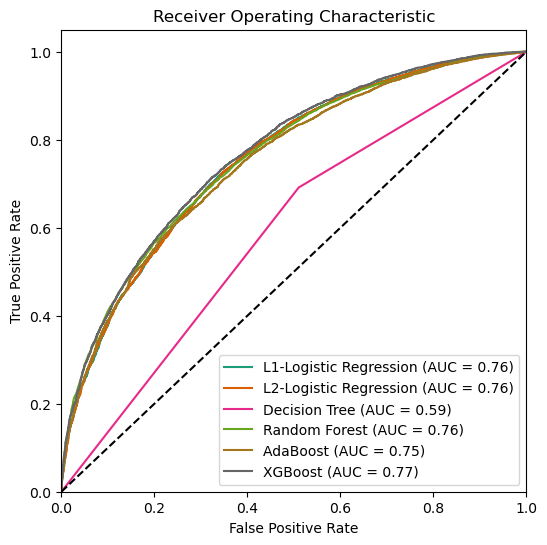

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# plot ROC of all models into one plot

models = ["L1-Logistic Regression", "L2-Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost","XGBoost"] 
probs = [y_prob_lasso, y_prob_l2,y_prob_dt,y_prob_rf, y_prob_ab, y_prob_xgb] 
colors = plt.cm.Dark2(np.linspace(0, 1, len(models)))
plt.figure(figsize=(6, 6))

for i in range(len(models)):
    model=models[i]
    fpr, tpr, _ = roc_curve(test_outcome, probs[i])  # y_true is your true labels
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i],label=f'{model} (AUC = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], color='black', linestyle='--',)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('/home/ab1/Desktop/SPH6004/assignment1_ROC_curves.jpg')
plt.show()



In [40]:
# compile dataframe of all evaluation metrics

scores = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}
#models = ["L1-Logistic Regression", "L2-Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost","XGBoost"] 
preds = [y_pred_lasso, y_pred_l2,y_pred_dt,y_pred_rf, y_pred_ab, y_pred_xgb]

for i in range(len(models)):
    model=models[i]
    accuracy = accuracy_score(test_outcome, preds[i])
    precision = precision_score(test_outcome, preds[i])
    recall = recall_score(test_outcome, preds[i])
    f1 = f1_score(test_outcome, preds[i])
    
    scores['Model'].append(model)
    scores['Accuracy'].append(accuracy)
    scores['Precision'].append(precision)
    scores['Recall'].append(recall)
    scores['F1 Score'].append(f1)


scores_df = pd.DataFrame(scores)
print(scores_df)
scores_df.to_csv("~/Desktop/SPH6004/assignment1_scores.csv")


                    Model  Accuracy  Precision    Recall  F1 Score
0  L1-Logistic Regression  0.688662   0.815065  0.689005  0.746752
1  L2-Logistic Regression  0.687287   0.814539  0.687039  0.745376
2           Decision Tree  0.624051   0.730027  0.691363  0.710169
3           Random Forest  0.723946   0.770811  0.833448  0.800906
4                AdaBoost  0.719233   0.765944  0.833153  0.798136
5                 XGBoost  0.735598   0.766638  0.867053  0.813759


### SVM

In [ ]:
# %%time
# # SVM
# from sklearn.svm import SVC
# from sklearn.model_selection import StratifiedKFold
# # 'C': strength of L2 regularization on linear SVM. Larger 'C' --> smaller regularization.
# parameters = {
#     'C':[0.1,1,10]
# }

# SVCModel = SVC(kernel='linear',random_state=42)
# Best_SVC = GridSearchCV(
#     SVCModel,
#     param_grid=parameters,
#     cv=5,
#     verbose=1,
#     n_jobs=-1
# )
# Best_SVC.fit(X_selected,y_SMOTE)

In [ ]:
# BestSVC.best_params_

In [ ]:
# # Tune and evaluate
# y_pred_svc = Best_SVC.predict(test_set)
# y_prob_svc = Best_SVC.predict_proba(test_set)[:, 1]